# 1. SABR Model 

In [11]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [13]:
alpha = 0.2 #initial volatility 
beta = 0.5 #elasticity parameter
nu = 0.3 #vol of vol 
rho = -0.4 #correlation between the two brownian motion 
fwd = 100

In [21]:
T = 1.0
steps = 252
dt = T / steps
time_grid = np.linspace(0, T, steps + 1)
fwd = 110
N = 1000 #number of simulation

In [31]:
Fwd_simul=pd.DataFrame()
Sigma_simul = pd.DataFrame()
for i in range (N): 
    # Simulation of Brownian
    W_1 = np.random.randn(steps) * (np.sqrt(T/steps))
    Z = np.random.randn(steps) *(np.sqrt(T/steps))
    W_2 = rho*W_1 +  np.sqrt(1-rho**2)*Z

    #Simulation of sigma 
    sigma = alpha * np.exp(-(1/2)*nu**2*T/steps + nu*np.cumsum(W_2))
    #Simulation of forward
    Fwd = np.zeros(steps + 1)
    Fwd[0] = fwd
    for t in range(steps):
        Fwd[t+1] = Fwd[t] + sigma[t] * (Fwd[t]**beta) * W_1[t]
    Fwd_simul[i] = Fwd
    Sigma_simul[i] = sigma


/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_10167/2649657013.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_10167/2649657013.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/lc/t3q2r39x05ndfqz7hm78wmkc0000gn/T/ipykernel_10167/2649657013.py:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

In [32]:
Fwd_simul

0           1           2           3           4           5    \
0    110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
1    110.096090  110.221487  110.035126  110.091166  110.077278  110.057204   
2    109.875384  110.036537  110.290192  110.230897  110.184863  110.063875   
3    109.750993  110.020794  110.278429  110.288854  110.278977  110.209039   
4    109.730991  110.251079  110.330663  110.369179  110.244610  110.304391   
..          ...         ...         ...         ...         ...         ...   
248  106.312448  110.137569  112.697720  111.949726  115.124192  106.090585   
249  106.150057  110.097532  112.641900  111.989224  115.010330  106.128074   
250  105.873739  110.167867  112.275718  112.022355  115.080675  106.239304   
251  105.987475  110.153730  112.302640  112.127019  115.161589  106.356781   
252  105.776248  110.218318  112.198867  112.253718  115.074234  106.309373   

            6           7           8           9    ...         990  \
0    110.000000  110.000000  110.000000  110.000000  ...  110.000000   
1    109.996318  110.127788  109.926061  109.801527  ...  110.208665   
2    109.716939  110.109225  109.752858  109.883106  ...  110.241313   
3    109.952869  110.055971  109.734173  109.822978  ...  110.185089   
4    109.790238  110.270614  109.585005  109.751395  ...  109.967110   
..          ...         ...         ...         ...  ...         ...   
248  111.867169  108.178069  107.858002  105.733652  ...  107.984269   
249  111.601983  108.335208  107.915488  106.028352  ...  108.128526   
250  111.542195  108.521290  107.822072  106.092990  ...  108.150630   
251  111.479509  108.576678  107.732453  106.131033  ...  108.239729   
252  111.597004  108.770625  107.951008  106.358605  ...  108.252110   

            991         992         993         994         995         996  \
0    110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
1    110.067206  110.014520  110.096052  110.131860  109.963332  110.040857   
2    110.051986  110.018468  110.123849  110.446339  110.040730  110.008137   
3    109.852076  110.002668  110.072682  110.418900  110.075041  109.963085   
4    109.688589  110.015702  110.075450  110.354073  110.278445  110.124954   
..          ...         ...         ...         ...         ...         ...   
248  104.869265  113.783945  113.284695  109.478144  112.575794  111.467585   
249  105.000368  113.574292  113.327565  109.622848  112.729258  111.387942   
250  105.120599  113.604204  113.323603  109.562343  112.449696  111.504935   
251  104.985794  113.744178  113.442215  109.872367  112.435685  111.379321   
252  105.264102  113.525275  113.391604  109.996299  112.579752  111.616504   

            997         998         999  
0    110.000000  110.000000  110.000000  
1    110.117066  109.863942  110.064251  
2    110.340352  109.995857  110.184639  
3    110.334350  109.858340  110.404845  
4    110.319994  109.402764  110.497172  
..          ...         ...         ...  
248  111.120585  109.585374  110.241030  
249  111.048852  109.822595  110.194053  
250  111.055100  109.719039  110.169191  
251  111.221584  109.809326  110.226668  
252  111.188026  109.896132  110.247135  

[253 rows x 1000 columns]

In [45]:
fig = px.line(Fwd_simul, y=Fwd_simul.index)
fig.show()


In [46]:
fig = px.line(Sigma_simul, y=Sigma_simul.index)
fig.show()

In [ ]:
z = (nu/alpha) * (fwd*strike)**((1-beta)/2) * np.log(fwd/strike)
x_z = np.log((np.sqrt(1 -2*z*rho + z**2) + z + rho)/(1-rho))

In [6]:
sigma_SABR = (alpha/(fwd*strike)**((1-beta)/2))*(z/x_z)* (1 + T * ((1-beta)**2/24) * (alpha**2/(fwd*strike)**(1-beta)) + (1/4) * (alpha*beta*rho*nu)/((fwd*strike)**((1-beta)/2)) + ((2-3*rho**2)*(nu**2))/24)

In [18]:
df  = pd.DataFrame(columns=['fwd','sigma'])
#df['fwd'] = 1
df['sigma'] = alpha * np.exp(-(1/2)*mu**2*T/steps + mu*np.cumsum(W_2))
df

fwd     sigma
0     NaN  0.049902
1     NaN  0.049818
2     NaN  0.049868
3     NaN  0.049860
4     NaN  0.049921
...   ...       ...
9995  NaN  0.053415
9996  NaN  0.053348
9997  NaN  0.053396
9998  NaN  0.053340
9999  NaN  0.053376

[10000 rows x 2 columns]

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index,y = df['fwd']))
fig.add_trace(go.Scatter(x=df.index,y = df['sigma']))
fig.show()


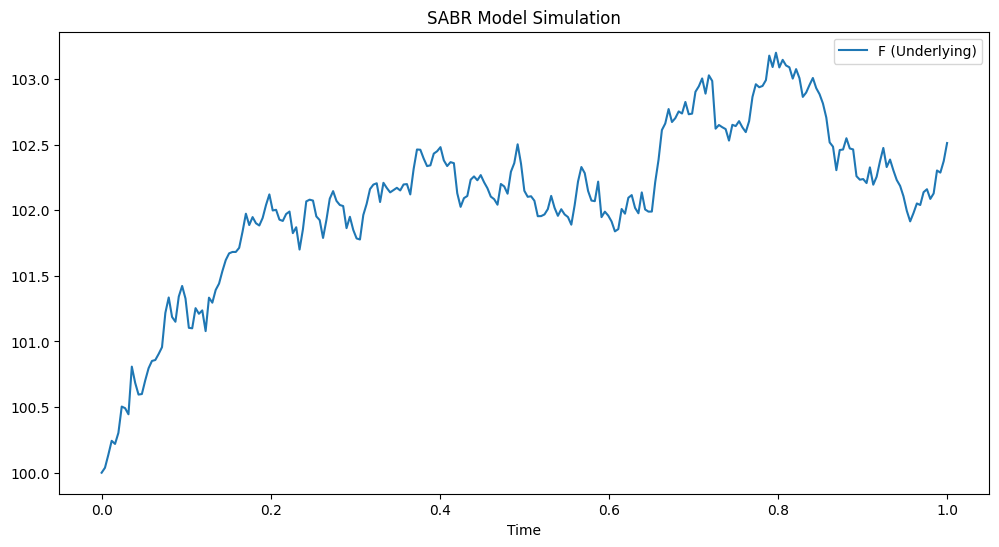

In [21]:


# SABR model parameters
F0 = 100.0        # Initial value of the underlying
sigma0 = 0.2      # Initial volatility
beta = 0.5        # Elasticity parameter (0 <= beta <= 1)
nu = 0.3          # Volatility of volatility (vol-of-vol)
rho = -0.4        # Correlation between the two Brownian motions

# Pre-allocate arrays for F (underlying) and sigma (volatility)
F = np.zeros(N + 1)
sigma = np.zeros(N + 1)
F[0] = F0
sigma[0] = sigma0

# Simulation loop
for t in range(N):
    # Generate the Brownian increments:
    # epsilon_sigma will be used to update sigma exactly
    epsilon_sigma = np.random.normal()
    # epsilon_indep is independent for generating the correlated increment for F
    epsilon_indep = np.random.normal()
    
    # Correlated increment for F:
    dW = rho * np.sqrt(dt) * epsilon_sigma + np.sqrt(1 - rho**2) * np.sqrt(dt) * epsilon_indep
    
    # Exact simulation for sigma (volatility)
    sigma[t+1] = sigma[t] * np.exp(nu * np.sqrt(dt) * epsilon_sigma - 0.5 * nu**2 * dt)
    
    # Euler-Maruyama discretization for F (the underlying)
    F[t+1] = F[t] + sigma[t] * (F[t] ** beta) * dW

# Plot the simulation paths
plt.figure(figsize=(12, 6))
plt.plot(time_grid, F, label='F (Underlying)')
plt.xlabel('Time')
plt.legend()
plt.title('SABR Model Simulation')
plt.show()